In [44]:
from google.colab import files, drive
import json
import PIL
from PIL import Image
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Sneak Peek at the JSON Data

In [32]:
with open("/content/annotations.json",'r') as f:
      json_values = json.loads(f.read())
for item in list(json_values.items()): 
  print(item[1]['filename']) 
  for details in item[1]['regions']:
    print('\tClass : ',  details['region_attributes']['class_name'])
    print('\t\tx : ', details['shape_attributes']['x'])
    print('\t\ty : ', details['shape_attributes']['y'])
    print('\t\twidth : ', details['shape_attributes']['width'])
    print('\t\theight : ', details['shape_attributes']['height'])

61a264add5dfeeb70530798ebbb8df84.jpg
	Class :  vest
		x :  132
		y :  156
		width :  281
		height :  427
99d5cbed83a1.jpg
	Class :  vest
		x :  351
		y :  309
		width :  100
		height :  138
	Class :  vest
		x :  455
		y :  307
		width :  57
		height :  93
	Class :  vest
		x :  692
		y :  285
		width :  48
		height :  90
	Class :  vest
		x :  930
		y :  281
		width :  66
		height :  107
	Class :  hardhat
		x :  395
		y :  239
		width :  63
		height :  53
343p-55-front-zip-front-breakaway-safety-vest.jpg
	Class :  vest
		x :  190
		y :  101
		width :  297
		height :  304
20180217D584937.jpg
	Class :  vest
		x :  206
		y :  517
		width :  652
		height :  979
34525323.jpg
	Class :  vest
		x :  19
		y :  87
		width :  51
		height :  73
	Class :  vest
		x :  66
		y :  53
		width :  64
		height :  82
214134135.jpg
	Class :  hardhat
		x :  213
		y :  185
		width :  253
		height :  147
	Class :  hardhat
		x :  786
		y :  339
		width :  269
		height :  168
	Class :  vest
		x :  173
		y :  454
		

# Converting JSON to simple and structured parseable data 

In [21]:
class JSON_Convert:

  def __init__(self, json_path, images_path):
    with open(json_path,'r') as f:
      self.json_values = json.loads(f.read())
    self.info, self.info_scaled = [], []
    self.images_path = images_path   

  def parse_json(self):    
    self.info = [{'File Name': image_object[1]['filename'], 'Class': details['region_attributes']['class_name'], 'Image Width': self.extract_image_size(image_object[1]['filename'])[0], 'Image Height': self.extract_image_size(image_object[1]['filename'])[1], 'BB Cx': details['shape_attributes']['x'], 'BB Cy': details['shape_attributes']['y'], 'BB Width': details['shape_attributes']['width'], 'BB Height': details['shape_attributes']['height']} for image_object in list(self.json_values.items()) for details in image_object[1]['regions']]
    self.info_scaled = [{'File Name': image_object[1]['filename'], 'Class': details['region_attributes']['class_name'], 'BB Cx_Scaled': (details['shape_attributes']['x'] / self.extract_image_size(image_object[1]['filename'])[0]), 'BB Cy_Scaled': (details['shape_attributes']['y'] / self.extract_image_size(image_object[1]['filename'])[1]), 'BB Width_Scaled': (details['shape_attributes']['width'] / self.extract_image_size(image_object[1]['filename'])[0]), 'BB Height_Scaled': (details['shape_attributes']['height'] / self.extract_image_size(image_object[1]['filename'])[1])} for image_object in list(self.json_values.items()) for details in image_object[1]['regions']]

  def extract_image_size(self, image_name):    
      with PIL.Image.open(os.path.join("./", self.images_path, image_name)) as image:
        return image.size

    
        


In [22]:
k = JSON_Convert("/content/annotations.json", '/content/gdrive/MyDrive/Image Annotations/Final/dataset')

In [23]:
k.parse_json()

# Creating Dataframes from the datapoints

In [26]:
df = pd.DataFrame(k.info)

In [28]:
df_scaled = pd.DataFrame(k.info_scaled)

In [30]:
df.head()

,File Name,Class,Image Width,Image Height,BB Cx,BB Cy,BB Width,BB Height
0,61a264add5dfeeb70530798ebbb8df84.jpg,vest,472,600,132,156,281,427
1,99d5cbed83a1.jpg,vest,1000,663,351,309,100,138
2,99d5cbed83a1.jpg,vest,1000,663,455,307,57,93
3,99d5cbed83a1.jpg,vest,1000,663,692,285,48,90
4,99d5cbed83a1.jpg,vest,1000,663,930,281,66,107


In [31]:
df_scaled.head()

,File Name,Class,BB Cx_Scaled,BB Cy_Scaled,BB Width_Scaled,BB Height_Scaled
0,61a264add5dfeeb70530798ebbb8df84.jpg,vest,0.279661,0.260000,0.595339,0.711667
1,99d5cbed83a1.jpg,vest,0.351000,0.466063,0.100000,0.208145
2,99d5cbed83a1.jpg,vest,0.455000,0.463047,0.057000,0.140271
3,99d5cbed83a1.jpg,vest,0.692000,0.429864,0.048000,0.135747
4,99d5cbed83a1.jpg,vest,0.930000,0.423831,0.066000,0.161388


# Scatter Plot of the Distribution

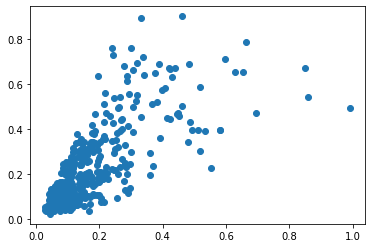

In [45]:
plt.scatter(list(df_scaled[:]["BB Width_Scaled"]), list(df_scaled[:]["BB Height_Scaled"]))

In [47]:
np_array = np.column_stack((list(df_scaled[:]["BB Width_Scaled"]), list(df_scaled[:]["BB Height_Scaled"])))

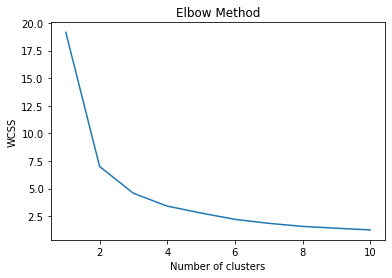

In [48]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(np_array)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

From the above graph, it seems that the graph starts to straighten somewhere around K = 5/6. So, we shall use the optimal K as 5 or 6 and check the plots

### Scatter plot at K = 5

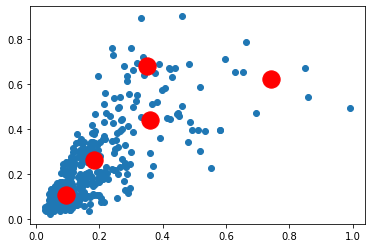

In [50]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(np_array)
plt.scatter(np_array[:,0], np_array[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

### Scatter Plot at K=6

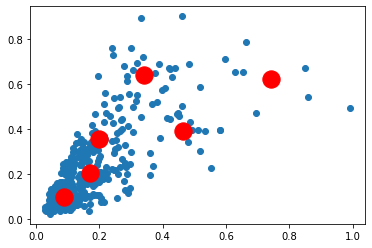

In [51]:
kmeans = KMeans(n_clusters=6, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(np_array)
plt.scatter(np_array[:,0], np_array[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()